# I. LOAD DỮ LIỆU

## 1) Import những thư viện cần thiết

In [182]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
from sklearn import metrics

%matplotlib inline
import datetime
import pandas as pd
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

## 2) Load dữ liệu

In [183]:
df = pd.read_csv('mushrooms.csv')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [185]:
for i in df.columns: #Chuyển đổi dữ liệu sang 'category'
    df[i] = df[i].astype('category')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [187]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [188]:
df1 = pd.read_csv('translate.csv')
df1

,columns_name,columns_translate,data,data_translate
0,class,Phân loại nấm,e,ăn được
1,class,Phân loại nấm,p,độc (không ăn được)
2,cap-shape,Hình dạng nón,x,lõm
3,cap-shape,Hình dạng nón,f,phẳng
4,cap-shape,Hình dạng nón,k,núm
...,...,...,...,...
114,habitat,Môi trường sống,p,path
115,habitat,Môi trường sống,l,cỏ
116,habitat,Môi trường sống,u,đá
117,habitat,Môi trường sống,m,đồng cỏ


In [189]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# II. DATA UNDERSTANDING

## 2.1 Mô tả dữ liệu

In [190]:
#Mô tả các cột trong dataset:
print(df.columns)
print('Số cột của dữ liệu (features): '  +str(len(df.columns)-1))
print('Số class của dữ liệu: '+str(len(df['class'].value_counts().index)) )
print('Số mẫu của dữ liệu: '  +str(df.shape[0]) )

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
Số cột của dữ liệu (features): 22
Số class của dữ liệu: 2
Số mẫu của dữ liệu: 8124


In [191]:
#Show các dữ liệu duplicate (nếu có):
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [192]:
#Mô tả các biến trong từng features:
print('Dữ liệu trong mỗi cột như sau:')
for i in df.columns:
    print('Dữ liệu của cột',i,":",list(df[i].value_counts().index))

Dữ liệu trong mỗi cột như sau:
Dữ liệu của cột class : ['e', 'p']
Dữ liệu của cột cap-shape : ['x', 'f', 'k', 'b', 's', 'c']
Dữ liệu của cột cap-surface : ['y', 's', 'f', 'g']
Dữ liệu của cột cap-color : ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u']
Dữ liệu của cột bruises : ['f', 't']
Dữ liệu của cột odor : ['n', 'f', 's', 'y', 'a', 'l', 'p', 'c', 'm']
Dữ liệu của cột gill-attachment : ['f', 'a']
Dữ liệu của cột gill-spacing : ['c', 'w']
Dữ liệu của cột gill-size : ['b', 'n']
Dữ liệu của cột gill-color : ['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']
Dữ liệu của cột stalk-shape : ['t', 'e']
Dữ liệu của cột stalk-root : ['b', '?', 'e', 'c', 'r']
Dữ liệu của cột stalk-surface-above-ring : ['s', 'k', 'f', 'y']
Dữ liệu của cột stalk-surface-below-ring : ['s', 'k', 'f', 'y']
Dữ liệu của cột stalk-color-above-ring : ['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
Dữ liệu của cột stalk-color-below-ring : ['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
Dữ liệu của cột veil-type

## 2.2 Exploreatory Data Analysis - EDA (Phân tích dữ liệu khám phá)

In [193]:
def plot_bar(df,name): #Function vẽ biểu đồ
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']    #màu của các cột
    a = list(df[name].value_counts().index)  
    b = list(df[name].value_counts())
    plt.bar(a,b,color=colors)
    plt.ylabel('Đếm')
    plt.title('Bảng phân bố cột '+str(name))
    for i in range(len(a)):
        plt.text(i,b[i],b[i],ha='center')
    return a,b

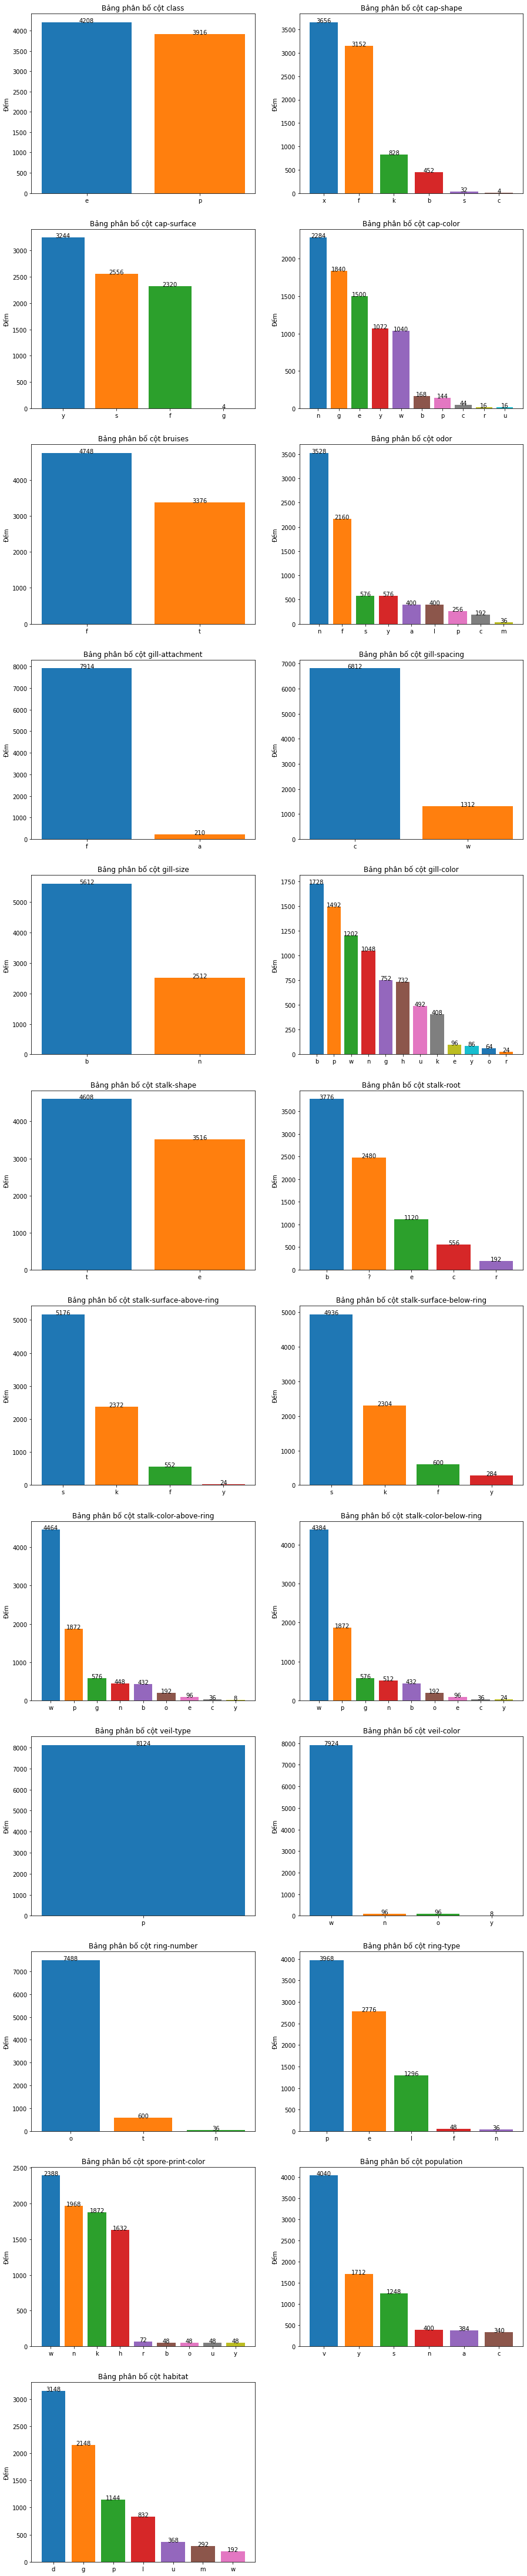

In [194]:
plt.figure(figsize=(15,100))   #Kích thước của mỗi biểu đồ
for n,i in enumerate(df.columns): #Vẽ các biểu đồ
    plt.subplot(15,2,n+1)
    plot_bar(df,i)
    n+=1

# III. DATA PREPARATION (Chuẩn bị dữ liệu)

## 1) Xử lý dữ liệu:

- Dựa vào các biểu đồ, ta có thể thấy:
    + feature 'veil-type' (loại màng) chỉ có 1 giá trị duy nhất. 
    + feature 'stalk-root' chứa hơn 1 nửa giá trị "?" (missing).

In [195]:
print('cột veil-type')
print(df['veil-type'].value_counts())

cột veil-type
p    8124
Name: veil-type, dtype: int64


In [196]:
print('cột stalk-root')
print(df['stalk-root'].value_counts(),'\n')
print('Số dữ liệu bị thiếu tại feature stalk-root: ',df['stalk-root'].value_counts()['?'])

cột stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64 

Số dữ liệu bị thiếu tại feature stalk-root:  2480


- Replace các giá trị missing và Drop cột 'Veil-type'

In [197]:
df.replace('?','missing',inplace=True)
df.drop(columns=['veil-type'],inplace=True)

## 2) Chuyển đổi thuộc tính dữ liệu:

In [198]:
#Dùng labe encoder để chuyển đổi dữ liệu, đồng thời tạo mapping để tiện chuyển đổi:
le = pp.LabelEncoder()
label_dict = {}
mapping = {}
for cols in df.columns:
    class_dict = {}
    df[cols] = le.fit_transform(df[cols])
    mapping[cols] = dict(zip(le.classes_, range(len(le.classes_))))
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [199]:
for i in df.columns:
    print(i)
    print(pd.Series(mapping[i]))

class
e    0
p    1
dtype: int64
cap-shape
b    0
c    1
f    2
k    3
s    4
x    5
dtype: int64
cap-surface
f    0
g    1
s    2
y    3
dtype: int64
cap-color
b    0
c    1
e    2
g    3
n    4
p    5
r    6
u    7
w    8
y    9
dtype: int64
bruises
f    0
t    1
dtype: int64
odor
a    0
c    1
f    2
l    3
m    4
n    5
p    6
s    7
y    8
dtype: int64
gill-attachment
a    0
f    1
dtype: int64
gill-spacing
c    0
w    1
dtype: int64
gill-size
b    0
n    1
dtype: int64
gill-color
b     0
e     1
g     2
h     3
k     4
n     5
o     6
p     7
r     8
u     9
w    10
y    11
dtype: int64
stalk-shape
e    0
t    1
dtype: int64
stalk-root
b          0
c          1
e          2
missing    3
r          4
dtype: int64
stalk-surface-above-ring
f    0
k    1
s    2
y    3
dtype: int64
stalk-surface-below-ring
f    0
k    1
s    2
y    3
dtype: int64
stalk-color-above-ring
b    0
c    1
e    2
g    3
n    4
o    5
p    6
w    7
y    8
dtype: int64
stalk-color-below-ring
b    0
c    1
e   

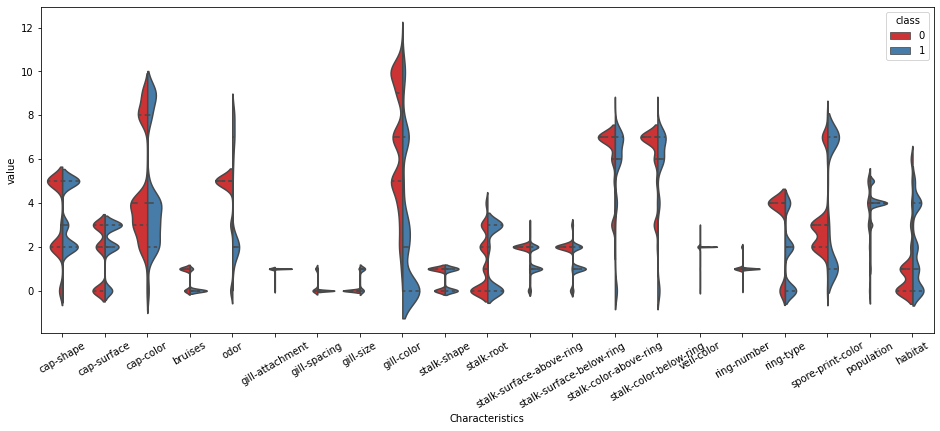

In [200]:
#Violin plot thể hiện tỉ lệ giữa class 0 và 1 trong các features:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 30, labels = list(df_no_class.columns));
plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

## 3) Chuẩn bị và phân tách dữ liệu

In [201]:
#Set giữ liệu cho X và Y:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
#Set headers:
headers = list(X.columns.values)

<AxesSubplot:>

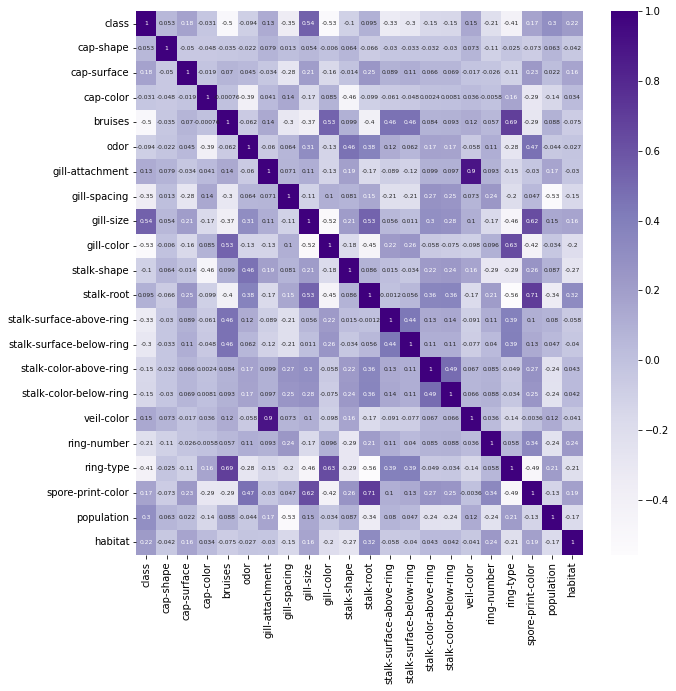

In [202]:
#Vẽ ma trận corr để xem độ tương quan của class với các features còn lại:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Purples',annot_kws={'size':6})


- Dựa vào ma trận tương quan, ta có thể thấy có 2 features có hệ số tương quan cao hơn:
   + gill-size : 0.54
   + gill-color: -0.53

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


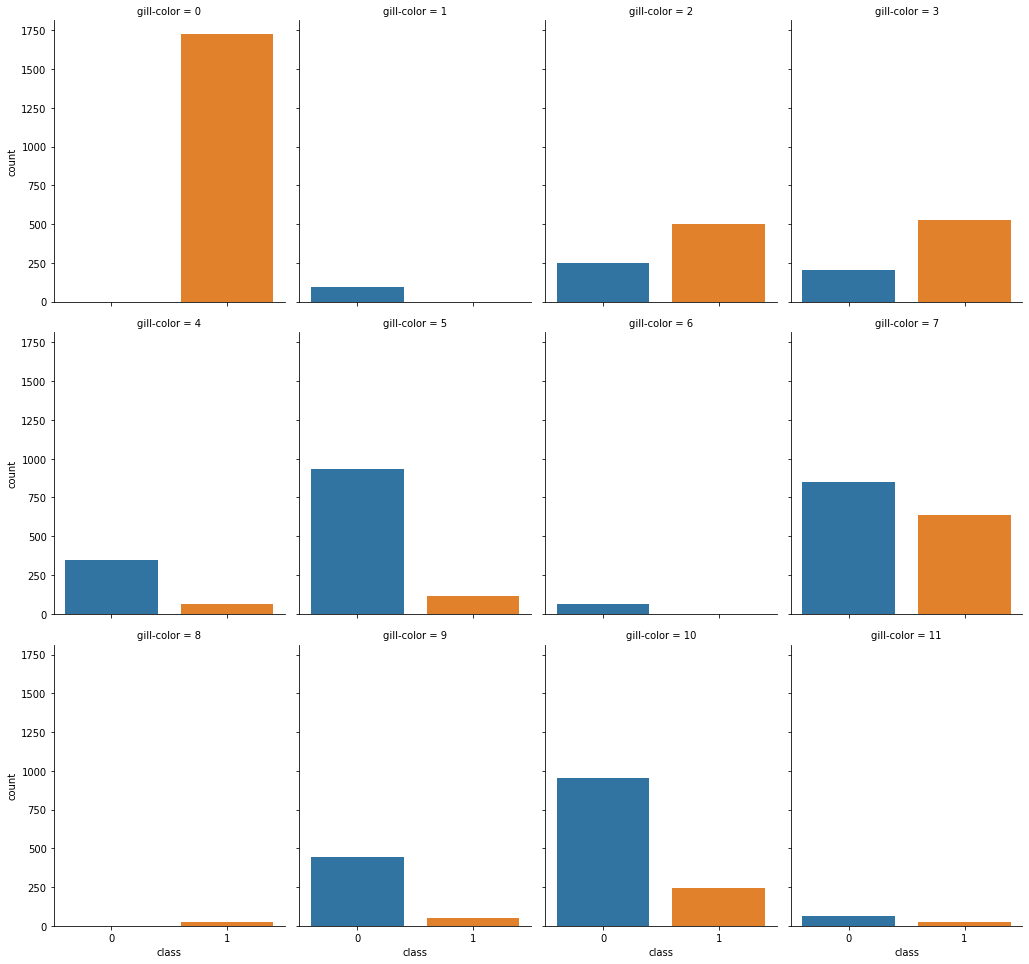

In [203]:
new_var = df[['class', 'gill-color']]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

- Kết luận:  gill-color code càng tăng thì rơi vô class 0 càng tăng.

In [204]:
df[['class', 'gill-size']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


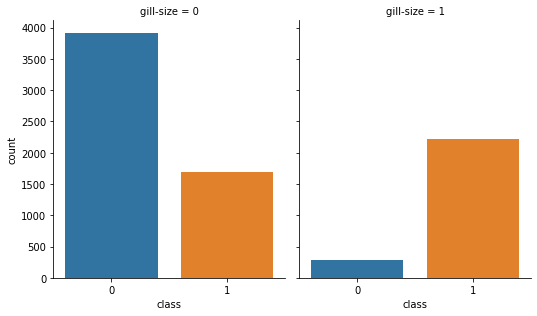

In [205]:
new_var1 = df[['class', 'gill-size']]
sns.factorplot('class', col='gill-size', data=new_var1, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [206]:
# Tách tập train, test, validation:
x_train, x_valtest, y_train,y_valtest = train_test_split(X,Y,test_size=0.2,random_state=0)
x_test,x_val,y_test,y_val = train_test_split(x_valtest,y_valtest,test_size=0.5,random_state=0)

In [207]:
print('Shape của tập x_train:',x_train.shape)
print('Shape của tập x_test :',x_test.shape)
print('Shape của tập x_val :',x_val.shape)
print('Shape của tập y_train:',y_train.shape)
print('Shape của tập y_test :',y_test.shape)
print('Shape của tập y_val :',y_val.shape)

Shape của tập x_train: (6499, 21)
Shape của tập x_test : (812, 21)
Shape của tập x_val : (813, 21)
Shape của tập y_train: (6499,)
Shape của tập y_test : (812,)
Shape của tập y_val : (813,)


# IV. MÔ HÌNH HÓA 

## 1) Desicion Tree:

### 1.1 Mô hình hóa

In [208]:
#Fine-Tune mô hình:
tree_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DT = GridSearchCV(DTC(),param_grid=tree_para,cv=10)
DT.fit(x_train,y_train)
print(DT.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


In [209]:
#Mô hình hóa
dt =DTC(criterion= 'gini', max_depth= 7, splitter='random')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dtc_f1score,dtc_precision,dtc_recall = f1_score(y_pred,y_test),precision_score(y_pred,y_test),recall_score(y_pred,y_test)
print('DT F1-Score : %.2f'%dtc_f1score)
print('DT Recall   : %.2f'%dtc_recall)
print('DT Precision: %.2f'%dtc_precision)

DT F1-Score : 1.00
DT Recall   : 1.00
DT Precision: 1.00


### 1.2 Biểu đồ đánh giá

#### Visualize f1-score

Features ảnh hưởng lớn nhất đến kết quả phần loại:  odor


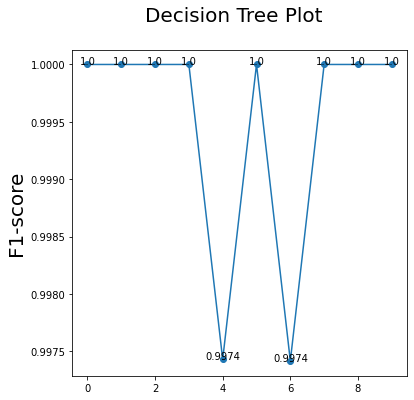

In [210]:
decision_tree = []
decision_tree_ans = []
for i in range(10):
    dt =DTC(criterion= 'gini', max_depth= 7, splitter='random') #Mô hình hóa
    dt.fit(x_train,y_train) #Fit mô hình
    prediction = dt.predict(x_test) # Dự đoán mô hình
    decision_tree.append(f1_score(y_test,prediction)) # Tính f1-score
    feature_temp = dt.feature_importances_ #Show important feature
    decision_tree_ans.append(feature_temp)
#Vẽ biểu đồ thyể hiện f1-score sau những lần chạy ngẫu nhiên:
plt.figure(figsize=(6,6))
plt.suptitle('Decision Tree Plot',fontsize=20)
plt.plot(decision_tree,'-o')
for i in range(len(decision_tree)):
    plt.text(i,decision_tree[i],round(decision_tree[i],4),ha='center')
plt.ylabel('F1-score',fontsize=20)

temp = []
for i in range(0,len(decision_tree_ans)):
    temp.append(np.argmax(decision_tree_ans[i]))
mode = max(set(temp),key=temp.count)
print('Features ảnh hưởng lớn nhất đến kết quả phần loại: ', headers[mode])

#### Cross-Validation

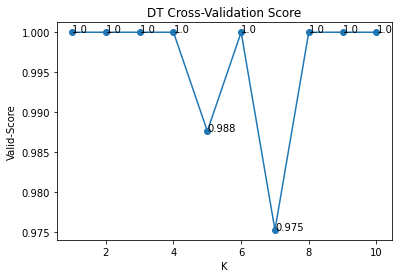

In [211]:
kf = KFold(n_splits=10)
DT_cross_score = cross_val_score(dt,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),DT_cross_score,'-o')
plt.title('DT Cross-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,DT_cross_score[i-1],round(DT_cross_score[i-1],3))
DT_cross_min = round(np.min(DT_cross_score),4)

#### Importance Feature

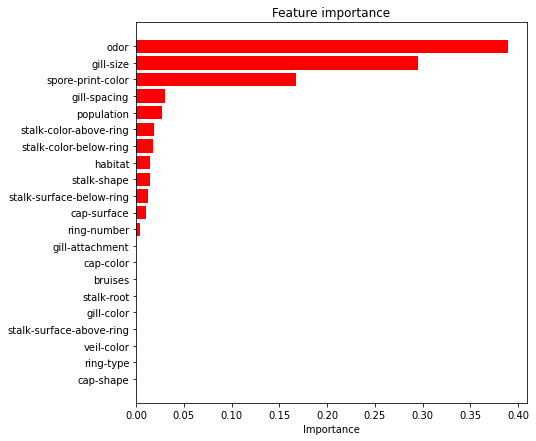

In [212]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(7,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### 1.3) Confusion Matrix - DT:

In [213]:
print('Decision Tree Classifier report: \n',classification_report(y_test,y_pred))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       388

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



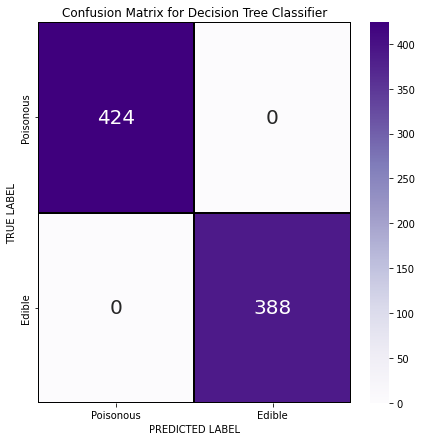

In [214]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2 ,annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 2) Logistic Regression:

### 2.1) Mô hình hóa

In [215]:
lr = LR(n_jobs=-1)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lgs_f1score,lgs_precision,lgs_recall = f1_score(lr_pred,y_test),precision_score(lr_pred,y_test),recall_score(lr_pred,y_test)
print('LR F1-Score : %.4f'%lgs_f1score)
print('LR Recall   : %.4f'%lgs_recall)
print('LR Precision: %.4f'%lgs_precision)

LR F1-Score : 0.9609
LR Recall   : 0.9711
LR Precision: 0.9510


### 2.2) Fine-Tuning

In [216]:
logis_para = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['liblinear','sag','saga','newton-cg'],'class_weight':[None,'balanced']}
LR_para = GridSearchCV(LR(),logis_para,cv=10,scoring='accuracy',n_jobs=-1)
LR_para.fit(x_train,y_train)

print(LR_para.best_params_)

{'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}


### 2.3) Chạy lại mô hình và đánh giá

#### Pre-train

In [217]:
Logistics = []
lr =LR(C=100,class_weight='balanced',solver='liblinear')
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
lgs_f1score,lgs_precision,lgs_recall = f1_score(prediction,y_test),precision_score(prediction,y_test),recall_score(prediction,y_test)
print('LR F1-Score : %.4f'%lgs_f1score)
print('LR Recall   : %.4f'%lgs_recall)
print('LR Precision: %.4f'%lgs_precision)

LR F1-Score : 0.9677
LR Recall   : 0.9714
LR Precision: 0.9639


#### NHẬN XÉT:
- Ta thấy sau khi fine-tuning mô hình cho kết quả tốt hơn.
- Ta chọn các parameters: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}

#### Cross-Validation 

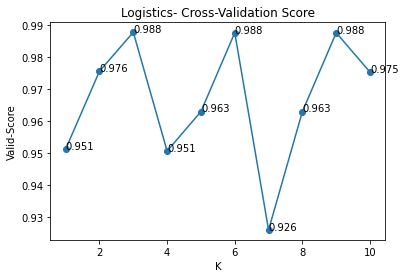

In [218]:
kf = KFold(n_splits=10)
lr_cross_score = cross_val_score(lr,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),lr_cross_score,'-o')
plt.title('Logistics- Cross-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,lr_cross_score[i-1],round(lr_cross_score[i-1],3))
LR_cross_min = round(np.min(lr_cross_score),4)

### 2.4) Confusion Matrix - LR

In [219]:
print('Decision Tree Classifier report: \n',classification_report(y_test,prediction))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       424
           1       0.97      0.96      0.97       388

    accuracy                           0.97       812
   macro avg       0.97      0.97      0.97       812
weighted avg       0.97      0.97      0.97       812



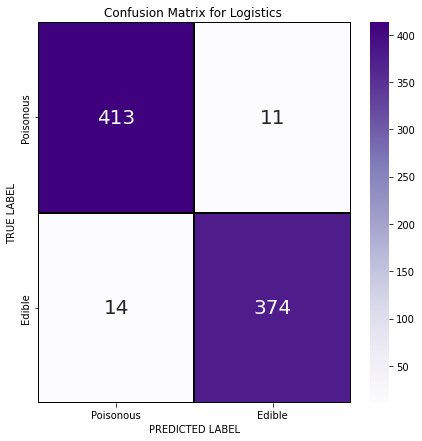

In [220]:
cm = confusion_matrix(y_test, prediction)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2,annot_kws={'size':20}, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistics ')
plt.show()

## 3) KNN

### 3.1) Chạy thử ngẫu nhiên các hệ số K để chọn ra K tốt nhất:

Giá trị K cho thông số tốt nhất là:  5
Giá trị f1-score 0.9987130


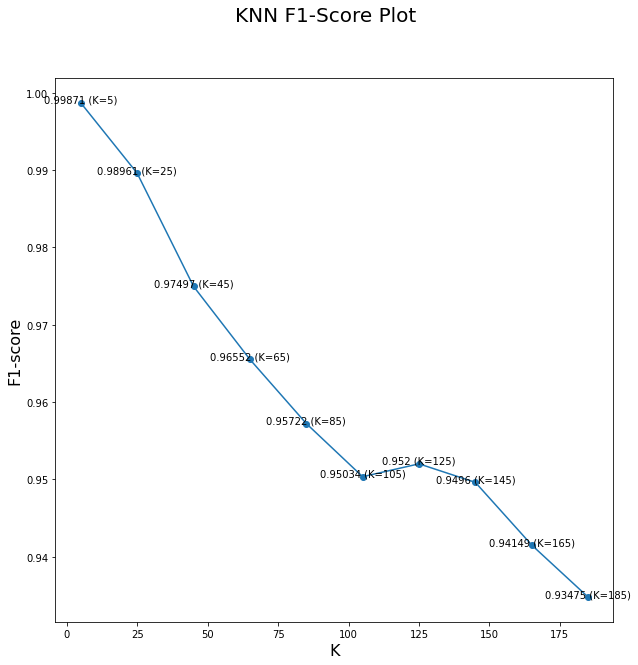

In [221]:
neighbours = [x for x in range(5,200,20)]
knn_1 = []
for i in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[i],n_jobs=-1)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    f1 = f1_score(y_test,prediction)
    knn_1.append(f1)
plt.figure(figsize=(10,10))
plt.suptitle('KNN F1-Score Plot',fontsize=20)
plt.plot(neighbours,knn_1,'-o')
for i in range(len(knn_1)):
    plt.text(neighbours[i],knn_1[i],f'{round(knn_1[i],5)} (K={neighbours[i]})',ha='center')
plt.ylabel('F1-score',fontsize=16)
plt.xlabel('K',fontsize=16)
print('Giá trị K cho thông số tốt nhất là: ',neighbours[knn_1.index(max(set(knn_1)))])
print('Giá trị f1-score %.7f' %max(set(knn_1)))

In [222]:
knn_para = dict(n_neighbors = neighbours,weights=['uniform','distance'],algorithm=['auto','ball_tree','kd_tree','brute'])
knn_grid = GridSearchCV(KNN(),param_grid=knn_para,scoring='accuracy')
grid_search = knn_grid.fit(x_train,y_train)
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


### 3.2) Chạy lại mô hình và đánh giá:

#### Pre-train

In [223]:
knn = KNN(n_neighbors=5,weights='distance',algorithm='auto',n_jobs=-1)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_f1score,knn_precision,knn_recall = f1_score(knn_pred,y_test),precision_score(knn_pred,y_test),recall_score(knn_pred,y_test)
print('KNN F1-Score : %.4f'%knn_f1score)
print('KNN Recall   : %.4f'%knn_recall)
print('KNN Precision: %.4f'%knn_precision)


KNN F1-Score : 0.9987
KNN Recall   : 0.9974
KNN Precision: 1.0000


#### Cross-Validation 

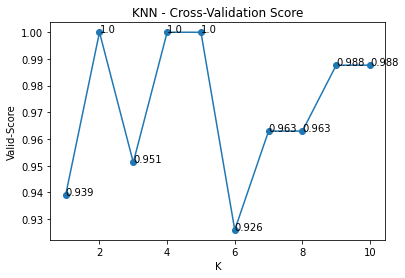

In [224]:
kf = KFold(n_splits=10)
knn_cross_score = cross_val_score(knn,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),knn_cross_score,'-o')
plt.title('KNN - Cross-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,knn_cross_score[i-1],round(knn_cross_score[i-1],3))
KNN_cross_min = round(np.min(knn_cross_score),4)

### 3.3) Confusion Matrix - KNN:

In [225]:
print('Decision Tree Classifier report: \n',classification_report(y_test,knn_pred))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       388

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



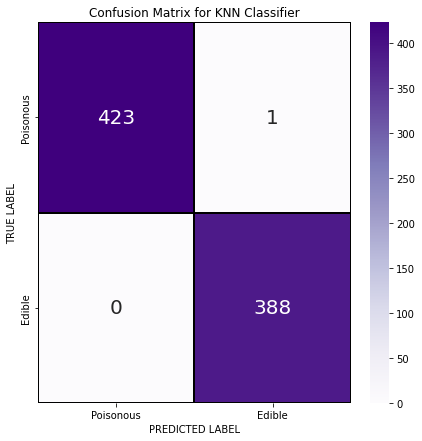

In [226]:
cm = confusion_matrix(y_test, knn_pred)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## 4) CatBoost

### 4.1) Mô hình hóa

In [227]:
clf = CatBoostClassifier(iterations=10,learning_rate=0.1)
clf.fit(x_train,y_train,
        eval_set=(x_val,y_val))
cat_prediction = clf.predict(x_test)
print(clf.get_params())

cat_f1score,cat_precision,cat_recall = f1_score(cat_prediction,y_test),precision_score(cat_prediction,y_test),recall_score(cat_prediction,y_test)
print('Catboost F1-Score : %.2f'%cat_f1score)
print('Catboost Recall   : %.2f'%cat_recall)
print('Catboost Precision: %.2f'%cat_precision)

0:	learn: 0.4327542	test: 0.4309761	best: 0.4309761 (0)	total: 1.9ms	remaining: 17.1ms
1:	learn: 0.2754750	test: 0.2737883	best: 0.2737883 (1)	total: 3.65ms	remaining: 14.6ms
2:	learn: 0.1965362	test: 0.1962462	best: 0.1962462 (2)	total: 5.16ms	remaining: 12ms
3:	learn: 0.1337793	test: 0.1338979	best: 0.1338979 (3)	total: 7.1ms	remaining: 10.7ms
4:	learn: 0.1001379	test: 0.0987310	best: 0.0987310 (4)	total: 8.66ms	remaining: 8.66ms
5:	learn: 0.0780265	test: 0.0760979	best: 0.0760979 (5)	total: 10.2ms	remaining: 6.82ms
6:	learn: 0.0590304	test: 0.0573901	best: 0.0573901 (6)	total: 12.4ms	remaining: 5.3ms
7:	learn: 0.0410356	test: 0.0401817	best: 0.0401817 (7)	total: 13.9ms	remaining: 3.48ms
8:	learn: 0.0361442	test: 0.0357835	best: 0.0357835 (8)	total: 15.3ms	remaining: 1.7ms
9:	learn: 0.0265495	test: 0.0262215	best: 0.0262215 (9)	total: 16.9ms	remaining: 0us

bestTest = 0.02622146201
bestIteration = 9

{'iterations': 10, 'learning_rate': 0.1}
Catboost F1-Score : 1.00
Catboost Recall   

### 4.2) Đánh giá

In [228]:
kf = KFold(n_splits=10)
cat_cross_score = cross_val_score(clf,x_val,y_val,cv=kf,fit_params={'verbose':False})
cat_cross_valscore = cat_cross_score
cat_cross_min = round(np.min(cat_cross_score),4)

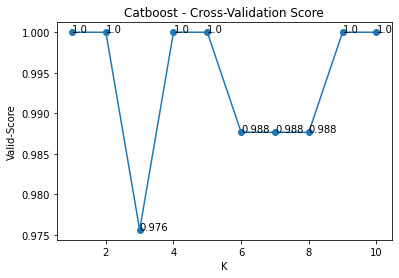

In [229]:
plt.plot(np.arange(1,11),cat_cross_valscore,'-o')
plt.title('Catboost - Cross-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,cat_cross_valscore[i-1],round(cat_cross_valscore[i-1],3))

#### 4.3) Confusion Matrix - Catboost

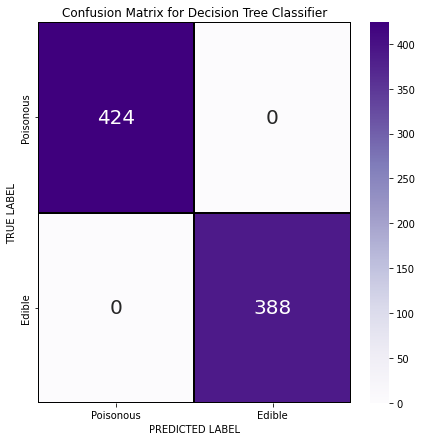

In [230]:
cm = confusion_matrix(y_test, cat_prediction)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 5) DNN

### 5.1) Modeling

In [231]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_val = np_utils.to_categorical(y_val)

In [232]:
model = Sequential()
model.add(Dense(32,input_shape=(21,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2,946
Trainable params: 2,946
Non-trainable params: 0
_________________________________________________________________


### 5.2) Fitting

In [233]:
hist = model.fit(x_train, Y_train,
         epochs=30,
         shuffle=True,
         batch_size=32,
         validation_data=(x_val, Y_val))

Epoch 1/30
204/204 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8469 - val_loss: 0.2020 - val_accuracy: 0.9373
Epoch 2/30
204/204 [==============================] - 0s 723us/step - loss: 0.1176 - accuracy: 0.9586 - val_loss: 0.0632 - val_accuracy: 0.9779
Epoch 3/30
204/204 [==============================] - 0s 711us/step - loss: 0.0529 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9914
Epoch 4/30
204/204 [==============================] - 0s 767us/step - loss: 0.0312 - accuracy: 0.9929 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 5/30
204/204 [==============================] - 0s 765us/step - loss: 0.0180 - accuracy: 0.9963 - val_loss: 0.0119 - val_accuracy: 0.9963
Epoch 6/30
204/204 [==============================] - 0s 726us/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.0081 - val_accuracy: 0.9975
Epoch 7/30
204/204 [==============================] - 0s 723us/step - loss: 0.0074 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 1

### 5.3) Prediction

In [234]:
dnn_prediction = model.predict(x_test)
dnn_prediction

26/26 [==============================] - 0s 456us/step


array([[1.00000000e+00, 3.18610416e-10],
       [9.99999642e-01, 3.82082135e-07],
       [1.75171408e-07, 9.99999881e-01],
       ...,
       [9.99999881e-01, 1.00160165e-07],
       [5.98133340e-07, 9.99999404e-01],
       [1.00000000e+00, 2.18411053e-10]], dtype=float32)

In [235]:
dnn_prediction_class = []
for i in range(dnn_prediction.shape[0]):
    dnn_prediction_class.append(np.argmax(dnn_prediction[i,:]))
dnn_f1score,dnn_precision,dnn_recall = f1_score(dnn_prediction_class,y_test),precision_score(dnn_prediction_class,y_test),recall_score(dnn_prediction_class,y_test)
print('DNN F1-Score : %.2f'%dnn_f1score)
print('DNN Recall   : %.2f'%dnn_recall)
print('DNN Precision: %.2f'%dnn_precision)

DNN F1-Score : 1.00
DNN Recall   : 1.00
DNN Precision: 1.00


### 5.4 Confusion Matrix - DNN

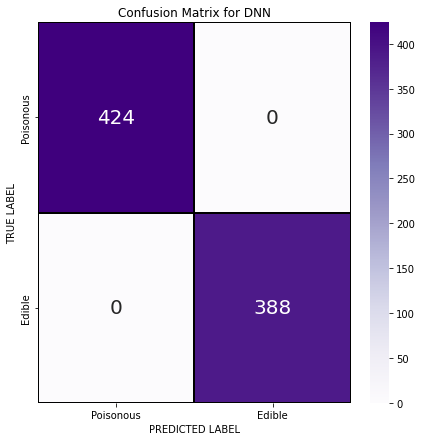

In [236]:
cm = confusion_matrix(y_test, dnn_prediction_class)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DNN')
plt.show()

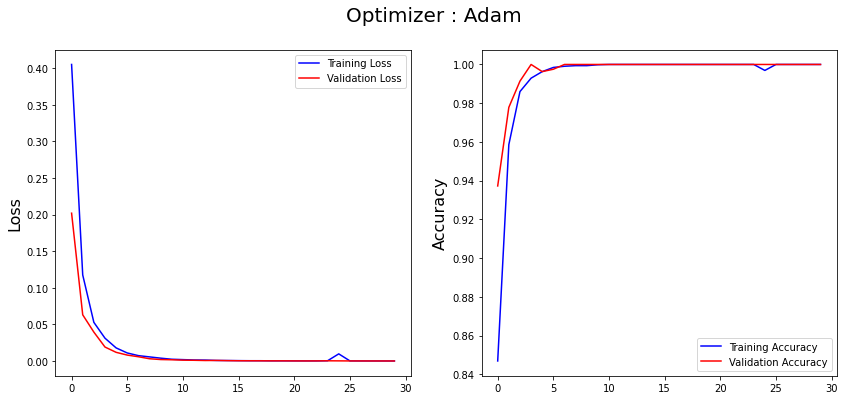

In [237]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# V. KẾT LUẬN

In [238]:
score_dict = {'KNN':[knn_f1score,knn_precision,knn_recall,KNN_cross_min],
            'Logistics':[lgs_f1score,lgs_precision,lgs_recall,LR_cross_min],
            'Decision Tree':[dtc_f1score,dtc_precision,dtc_recall,DT_cross_min],
            'Cat boost':[cat_f1score,cat_precision,cat_recall,cat_cross_min],
            'DNN':[dnn_f1score,dnn_precision,dnn_recall,'-']}
score_df = pd.DataFrame(score_dict,index=['F1-Score','Precision-Score','Recall-Score','Cross-Validation'])
score_df

,KNN,Logistics,Decision Tree,Cat boost,DNN
F1-Score,0.998713,0.967658,1.0000,1.0000,1.0
Precision-Score,1.000000,0.963918,1.0000,1.0000,1.0
Recall-Score,0.997429,0.971429,1.0000,1.0000,1.0
Cross-Validation,0.925900,0.925900,0.9753,0.9756,-


=> Ta thấy rằng với các mô hình, kết quả cho gần như tuyệt đối

# VI. Test lại với 2 bộ features cụ thể:
<p>
<li> Bộ 1 có |corr| > 0.4 </li>
<li> Bộ 2 có |corr| < 0.4 </li>
</p>

## 1 Ta đánh giá các chỉ số với Bộ 1

In [239]:
#Bộ dữ liệu |corr| > 0.4
x_train_1 = x_train[['gill-size','gill-color','ring-type']]
x_test_1  = x_test[['gill-size','gill-color','ring-type']]
x_val_1   = x_val[['gill-size','gill-color','ring-type']]


In [240]:
#Bộ dữ liệu |corr| < 0.4
x_train_2 = x_train.drop(['gill-size','gill-color','ring-type'],axis=1)
x_test_2 = x_test.drop(['gill-size','gill-color','ring-type'],axis=1)
x_val_2 = x_val.drop(['gill-size','gill-color','ring-type'],axis=1)

In [241]:
def evaluation_function(model,x_train,x_test,x_val): #Hàm đánh giá mô hình
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    f1score,precision,recall = f1_score(pred,y_test),precision_score(pred,y_test),recall_score(pred,y_test)
    kf = KFold(n_splits=10)
    cross_valid = cross_val_score(model,x_val,y_val,cv=kf)
    score_list = [f1score,precision,recall,np.min(cross_valid)]
    return score_list

In [242]:
#Fine-Tune mô hình KNN
knn_para = dict(n_neighbors = neighbours,weights=['uniform','distance'],algorithm=['auto','ball_tree','kd_tree','brute'])
knn_grid = GridSearchCV(KNN(),param_grid=knn_para,scoring='accuracy')
grid_search = knn_grid.fit(x_train_1,y_train)
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 45, 'weights': 'distance'}


In [243]:
#Fine-Tune mô hình Logistics
logis_para = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['liblinear','sag','saga','newton-cg'],'class_weight':[None,'balanced']}
LR_para = GridSearchCV(LR(),logis_para,cv=10,scoring='accuracy',n_jobs=-1)
LR_para.fit(x_train_1,y_train)

print(LR_para.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'sag'}


In [244]:
#Fine-Tune mô hình DTC
tree_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DT = GridSearchCV(DTC(),param_grid=tree_para,cv=10)
DT.fit(x_train_1,y_train)
print(DT.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}


In [245]:
#Mô hình hóa theo fine-tune:
LR_test =LR(C=0.1,class_weight='balanced',solver='sag')
knn_test = KNN(n_neighbors=45,weights='distance',algorithm='auto',n_jobs=-1)
dt_test =DTC(criterion= 'gini', max_depth= 6, splitter='best')
cat_test = CatBoostClassifier(iterations=10,learning_rate=0.1)

In [246]:
#Lưu đánh giá mô hình
score_dict_1 = {'KNN':evaluation_function(knn_test,x_train_1,x_test_1,x_val_1),
            'Logistics':evaluation_function(LR_test,x_train_1,x_test_1,x_val_1),
            'Decision Tree':evaluation_function(dt_test,x_train_1,x_test_1,x_val_1),
            'Cat boost':evaluation_function(cat_test,x_train_1,x_test_1,x_val_1)}

0:	learn: 0.6224244	total: 716us	remaining: 6.45ms
1:	learn: 0.5602079	total: 1.93ms	remaining: 7.71ms
2:	learn: 0.5107619	total: 2.7ms	remaining: 6.3ms
3:	learn: 0.4691453	total: 3.55ms	remaining: 5.32ms
4:	learn: 0.4337025	total: 4.33ms	remaining: 4.33ms
5:	learn: 0.4014562	total: 5.22ms	remaining: 3.48ms
6:	learn: 0.3731923	total: 6.06ms	remaining: 2.6ms
7:	learn: 0.3500102	total: 6.97ms	remaining: 1.74ms
8:	learn: 0.3286821	total: 7.86ms	remaining: 873us
9:	learn: 0.3101389	total: 8.72ms	remaining: 0us
0:	learn: 0.6303591	total: 299us	remaining: 2.69ms
1:	learn: 0.5783330	total: 576us	remaining: 2.3ms
2:	learn: 0.5346777	total: 911us	remaining: 2.13ms
3:	learn: 0.4943550	total: 1.19ms	remaining: 1.78ms
4:	learn: 0.4605679	total: 1.43ms	remaining: 1.43ms
5:	learn: 0.4316928	total: 1.73ms	remaining: 1.15ms
6:	learn: 0.4064941	total: 1.97ms	remaining: 844us
7:	learn: 0.3842351	total: 2.48ms	remaining: 621us
8:	learn: 0.3652208	total: 2.87ms	remaining: 318us
9:	learn: 0.3485301	total: 

In [247]:
score_df_1 = pd.DataFrame(score_dict_1,index=['F1-Score','Precision-Score','Recall-Score','Cross-Validation'])
score_df_1

,KNN,Logistics,Decision Tree,Cat boost
F1-Score,0.938562,0.785530,0.938562,0.933159
Precision-Score,0.925258,0.783505,0.925258,0.917526
Recall-Score,0.952255,0.787565,0.952255,0.949333
Cross-Validation,0.864198,0.654321,0.864198,0.851852


NHẬN XÉT:
- Ta thấy với bộ 1: Kết quả cho thấp hơn so với bộ all-features

## 2 Ta tiến hành tương tự với Bộ 2

In [248]:
knn_para = dict(n_neighbors = neighbours,weights=['uniform','distance'],algorithm=['auto','ball_tree','kd_tree','brute'])
knn_grid = GridSearchCV(KNN(),param_grid=knn_para,scoring='accuracy')
grid_search = knn_grid.fit(x_train_2,y_train)
print(grid_search.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [249]:
logis_para = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['liblinear','sag','saga','newton-cg'],'class_weight':[None,'balanced']}
LR_para = GridSearchCV(LR(),logis_para,cv=10,scoring='accuracy',n_jobs=-1)
LR_para.fit(x_train_2,y_train)

print(LR_para.best_params_)

{'C': 50, 'class_weight': 'balanced', 'solver': 'newton-cg'}


In [250]:
tree_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DT = GridSearchCV(DTC(),param_grid=tree_para,cv=10)
DT.fit(x_train_2,y_train)
print(DT.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}


In [251]:
LR_test_2 =LR(C=50,class_weight='balanced',solver='newton-cg')
knn_test_2 = KNN(n_neighbors=5,weights='distance',algorithm='auto',n_jobs=-1)
dt_test_2 =DTC(criterion= 'gini', max_depth= 10, splitter='best')
cat_test_2 = CatBoostClassifier(iterations=10,learning_rate=0.1)

In [252]:
score_dict_2 = {'KNN':evaluation_function(knn_test_2,x_train_2,x_test_2,x_val_2),
            'Logistics':evaluation_function(LR_test_2,x_train_2,x_test_2,x_val_2),
            'Decision Tree':evaluation_function(dt_test_2,x_train_2,x_test_2,x_val_2),
            'Cat boost':evaluation_function(cat_test_2,x_train_2,x_test_2,x_val_2)}

0:	learn: 0.6050639	total: 850us	remaining: 7.66ms
1:	learn: 0.5325360	total: 1.77ms	remaining: 7.07ms
2:	learn: 0.4728447	total: 2.6ms	remaining: 6.07ms
3:	learn: 0.4220277	total: 3.7ms	remaining: 5.55ms
4:	learn: 0.3744805	total: 4.6ms	remaining: 4.6ms
5:	learn: 0.3355882	total: 5.44ms	remaining: 3.63ms
6:	learn: 0.3027128	total: 6.17ms	remaining: 2.65ms
7:	learn: 0.2723108	total: 6.98ms	remaining: 1.74ms
8:	learn: 0.2454251	total: 7.85ms	remaining: 872us
9:	learn: 0.2243495	total: 8.9ms	remaining: 0us
0:	learn: 0.6214070	total: 13.6ms	remaining: 123ms
1:	learn: 0.5556236	total: 14.2ms	remaining: 56.7ms
2:	learn: 0.5034797	total: 14.7ms	remaining: 34.3ms
3:	learn: 0.4625794	total: 15.2ms	remaining: 22.9ms
4:	learn: 0.4188062	total: 15.8ms	remaining: 15.8ms
5:	learn: 0.3860813	total: 16.2ms	remaining: 10.8ms
6:	learn: 0.3524352	total: 16.6ms	remaining: 7.13ms
7:	learn: 0.3263303	total: 17ms	remaining: 4.26ms
8:	learn: 0.3018266	total: 17.4ms	remaining: 1.94ms
9:	learn: 0.2830657	total

In [253]:
score_df_2 = pd.DataFrame(score_dict_2,index=['F1-Score','Precision-Score','Recall-Score','Cross-Validation'])
score_df_2

,KNN,Logistics,Decision Tree,Cat boost
F1-Score,1.000000,0.916777,1.000000,0.986945
Precision-Score,1.000000,0.894330,1.000000,0.974227
Recall-Score,1.000000,0.940379,1.000000,1.000000
Cross-Validation,0.950617,0.839506,0.987654,0.963415


### NHẬN XÉT
<li> Ta thấy với Bộ 2 có kết quả cao hơn Bộ 1 </li>
<li> Với Bộ All-Features ta được kết quả cao nhất </li>
<li> Đến đây ta có thể kết luận: Các nhiều Features mô hình càng cho kết quả cao hơn </li>
